# What are the effects of each variable on thermal evolution?
<a class="anchor" id="top"></a>
<p align="right">
Variables are:
+ $\phi_{rcmf}$ - rheologically critical melt fraction [0.2,0.5] - params_1
+ $\eta_0$ - reference viscsoity [1e10,1e25]Pas - params_2
+ frht - Arrhenius slope of the viscosity law [0.005,0.08]$K^{-1}$ - params_3
+ $\eta_l$ - liquid viscosity [10,1000]Pas -params_4
+ $X_{S,0}$ - initial core sulfur content [28,32]wt% - params_5
+ $^{60}Fe/^{56}Fe$ - radiogenic iron fraction in accreting material [0,1e-7] - params_6
+ $\alpha_n$ - diffusion vs dislocation creep [25,30] - params_7
+ radius [100,400]km - params_8

For each variable there are two [temperature-time](#Tt) and [flux-time](#Ft) plots for the two endmembers.
Across all values, there are plots for:
+ [peak core and mantle temperatures](#peakT)
+ [Magnetic Reynolds number](#Rem)
+ [Magnetic field strength](#B)
+ [Rem and B](#BRem-split) split by thermal and compositional dynamo
+ [Rem and B](#BRem-p) with compositional buoyancy/thermal buoyancy overplotted <i>This is a bit messy</i>
+ [Rem and B](#BRem-solid) with onset of core solidification overplotted <i>This is the autosaved B Rem plot.</i>
+ [Inner core size](#f)
+ [timings](#time) all thermal history timings
+ [Dynamo timings](#dynamo)
+ [Solidification time](#solid)

# Set-up
This can be run once for a specific variable

## Import libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

Colours for plotting (there are a lot as there are a lot of values of $\eta_0$)

In [19]:
colors = ['black','darkblue','blue','royalblue','cornflowerblue','paleturquoise','salmon','maroon','saddlebrown','chocolate','orange','tan','olive','olivedrab','yellowgreen','darkolivegreen']

## Import data

In [2]:
folder = 'Singlevar1/'
subfolders = {'rcmf':1,'eta0':2,'frht':3,'etal':4,'Xs_0':5,'Fe0':6,'alpha_n':7,'r':8}
labels = {'rcmf':'$\\phi_{{RCMF}}$','eta0':'$\\eta_0$','frht':'frht','etal':'$\\eta_l$','Xs_0':'$X_{{s,0}}$','Fe0':'$^{{60}}Fe/^{{56}}Fe$','alpha_n':'$\\alpha_n$','r':'radius'}
Myr = 365*24*3600*1e6 #number of s in Myr

Choose your variable of interest

In [3]:
var = 'rcmf'
varlab = labels[var]
logvar = False
save = False
path = '../Results_combined/'+folder+f"params_{subfolders[var]}/"

Import the temperature profile data for the two endmembers

In [4]:
#find run numbers
var_data = pd.read_csv(path+'auto_params.csv',skiprows=[1])
var_results = pd.read_csv(path+'run_results.csv',skiprows=[1])
data = pd.merge(var_data,var_results,on='run')
minrun = min(var_data['run'])
maxrun = max(var_data['run'])
nrun = len(var_data)

Find min and max var values for labelling

In [17]:
var1=var_data.loc[var_data['run']==minrun,var].values[0]
var2=var_data.loc[var_data['run']==maxrun,var].values[0]

## Import lowest endmember

In [5]:
#End member 1
run = int(minrun)
npzfile = np.load(f'{path}run_{run}_diff.npz')
Tdiff = npzfile['Tdiff'] 
tdiff = npzfile['t_diff']/Myr
d0_diff = npzfile['d0']

npzfile = np.load(f'{path}run_{run}.npz')
T_profile = npzfile['T_profile']
t1 = npzfile['t']/Myr #time in Myr
d01 = npzfile['d0'] 
min_unstable = npzfile['min_unstable'] 
Flux = npzfile['Flux']
Fs1 = Flux[0]
Fcmb1 = Flux[1]
Fad1 = Flux[2]
Frad1 = Flux[3]

#get time for switch to conduction
fcond_t1 = var_results.loc[var_results['run']==run,'fcond_t'].values[0]
#Concatenate
Tall_1 = np.hstack((Tdiff,np.transpose(T_profile)))
tall_1 = np.append(tdiff,t1)
d0_all_1 = np.append(d0_diff,d01)
dr = var_data.loc[var_data['run']==run,'dr'].values[0]
r1 = var_data.loc[var_data['run']==run,'r'].values[0]
rplot_1 = np.arange(0,r1+dr,dr)/1e3

In [6]:
#find unstable indices for plotting core stratification
r_unstable1=np.array([]) 
for ind in min_unstable:
    r_unstable1 = np.append(r_unstable1,rplot_1[int(ind)])
rc1 = r1/2

## Import highest endmember

In [7]:
#End member 2
run = int(maxrun)
npzfile = np.load(f'{path}run_{run}_diff.npz')
Tdiff = npzfile['Tdiff'] 
tdiff = npzfile['t_diff']/Myr
d0_diff = npzfile['d0']

npzfile = np.load(f'{path}run_{run}.npz')
T_profile = npzfile['T_profile']
t2 = npzfile['t']/Myr #time in Myr 
d02 = npzfile['d0'] 
min_unstable = npzfile['min_unstable'] 
Flux = npzfile['Flux']
Fs2 = Flux[0]
Fcmb2 = Flux[1]
Fad2 = Flux[2]
Frad2 = Flux[3]
#get time for switch to conduction
fcond_t2 = var_results.loc[var_results['run']==run,'fcond_t'].values[0]

#Concatenate
Tall_2 = np.hstack((Tdiff,np.transpose(T_profile)))
tall_2 = np.append(tdiff,t2)
d0_all_2 = np.append(d0_diff,d02)
dr = var_data.loc[var_data['run']==run,'dr'].values[0]
r2 = var_data.loc[var_data['run']==run,'r'].values[0]
rplot_2 = np.arange(0,r2+dr,dr)/1e3

In [8]:
#find unstable indices for plotting core stratification
r_unstable2=np.array([]) 
for ind in min_unstable:
    r_unstable2 = np.append(r_unstable2,rplot_2[int(ind)])
rc2 = r2/2

## Temperature profiles <a class="anchor" id="Tt"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

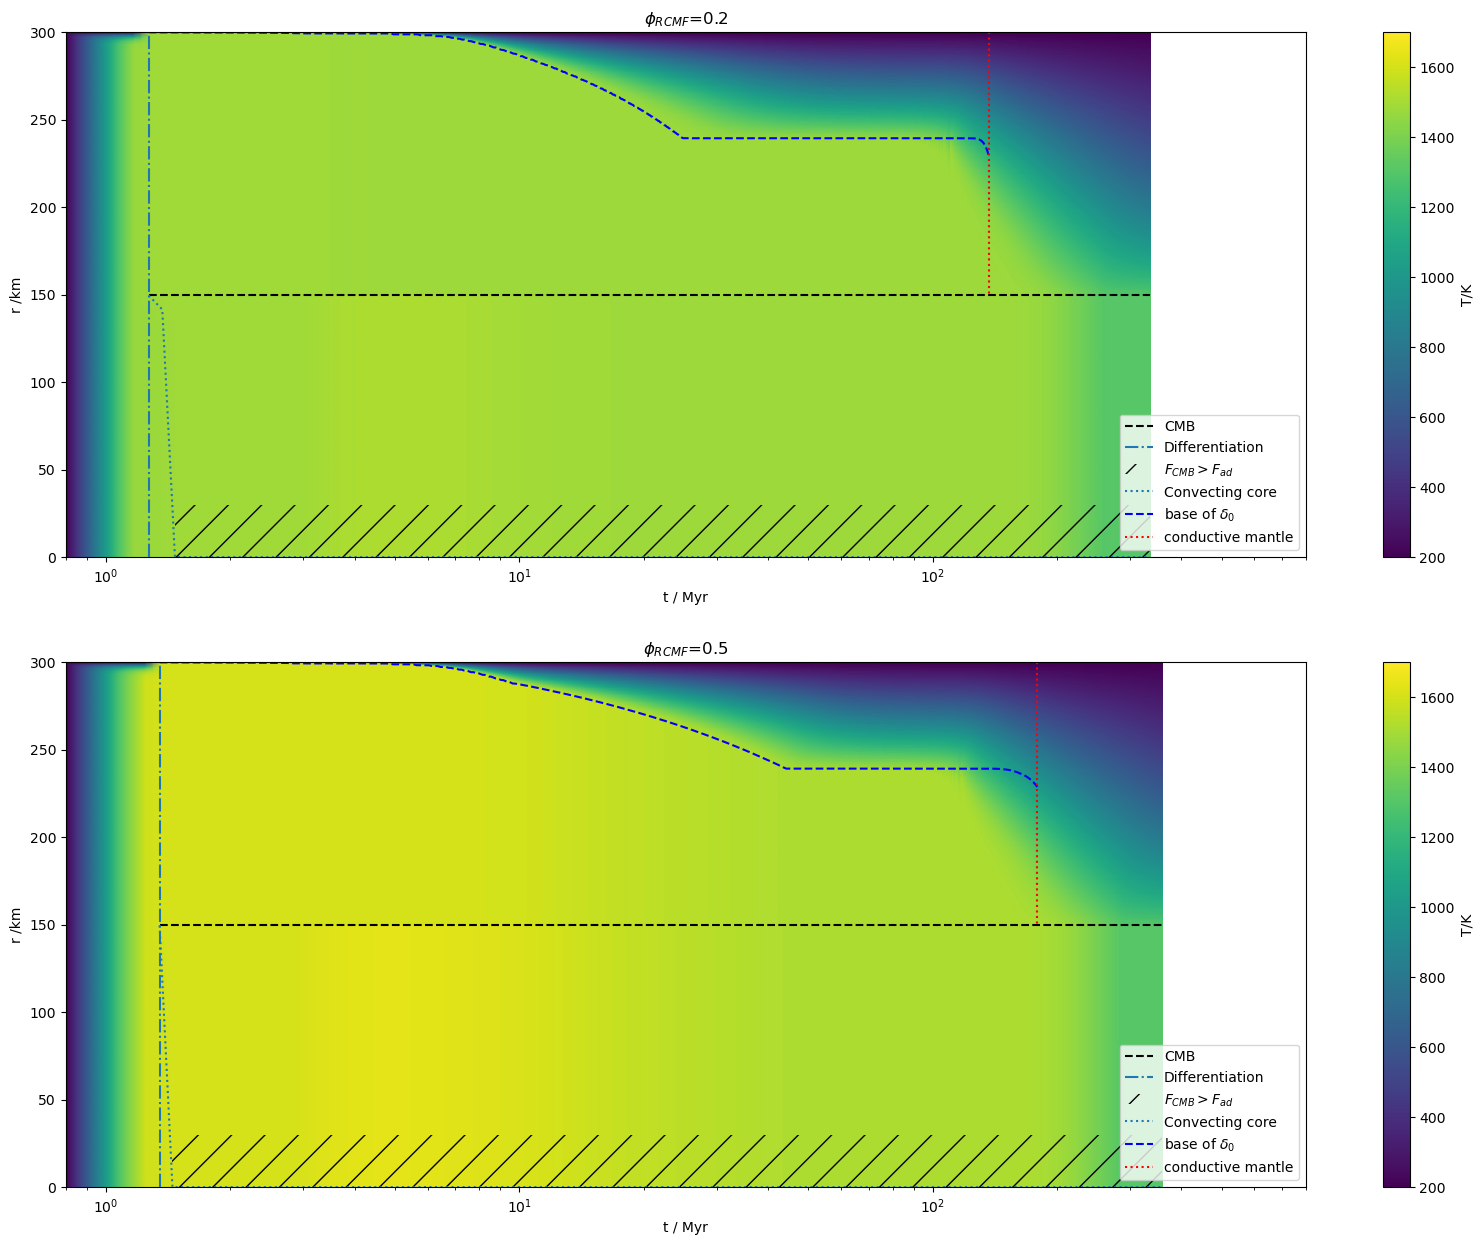

In [9]:
plt.figure(figsize=[20,15])
#subplot 1 - min value
plt.subplot(2,1,1)
plt.pcolormesh(tall_1,rplot_1,Tall_1,shading = 'gouraud',vmin=200,vmax=1700)
plt.hlines(rc1/1e3,min(t1),max(tall_1),linestyle='--',color='black',label='CMB')
plt.vlines(t1[0],0,r1/1e3,linestyle='-.',label='Differentiation')
plt.fill_betweenx([0,rc1/5e3],t1[np.where(Fcmb1>Fad1)[0]][0],t1[np.where(Fcmb1>Fad1)[0]][-1],alpha=0,hatch='/',label='$F_{CMB}>F_{ad}$')
plt.plot(t1,r_unstable1,linestyle='dotted',label='Convecting core')
if np.any(t1/Myr<fcond_t1):
    plt.plot(t1[t1<=fcond_t1],(r1-d01[t1<=fcond_t1])/1e3,linestyle='dashed',label='base of $\delta_0$',color='blue')
    plt.vlines(t1[t1<=fcond_t1][-1],r1/1e3,rc1/1e3,linestyle='dotted',label='conductive mantle',color='red')
#labels and limits
plt.ylabel('r /km')
plt.xlabel('t / Myr')
plt.xlim([0.8,800])
plt.colorbar(label='T/K')
plt.title(f"{varlab}={var_data.loc[var_data['run']==minrun,var].values[0]}")
plt.xscale('log')
plt.legend(loc='lower right')

#subplot 2 - max value
plt.subplot(2,1,2)
plt.pcolormesh(tall_2,rplot_2,Tall_2,shading = 'gouraud',vmin=200,vmax=1700)
plt.hlines(rc2/1e3,min(t2),max(tall_2),linestyle='--',color='black',label='CMB')
plt.vlines(t2[0],0,r2/1e3,linestyle='-.',label='Differentiation')
plt.fill_betweenx([0,rc2/5e3],t2[np.where(Fcmb2>Fad2)[0]][0],t2[np.where(Fcmb2>Fad2)[0]][-1],alpha=0,hatch='/',label='$F_{CMB}>F_{ad}$')
plt.plot(t2,r_unstable2,linestyle='dotted',label='Convecting core')
if np.any(t2/Myr<fcond_t2):
    plt.plot(t2[t2<=fcond_t2],(r2-d02[t2<=fcond_t2])/1e3,linestyle='dashed',label='base of $\delta_0$',color='blue')
    plt.vlines(t2[t2<=fcond_t2][-1],r2/1e3,rc2/1e3,linestyle='dotted',label='conductive mantle',color='red')
#labels and limits
plt.ylabel('r /km')
plt.xlabel('t / Myr')
plt.xlim([0.8,800])
plt.colorbar(label='T/K')
plt.title(f"{varlab}={var_data.loc[var_data['run']==maxrun,var].values[0]}")
plt.xscale('log')
plt.legend(loc='lower right')
if save == True:
    plt.savefig(f'../Plots/{folder}/Tcomp_{var}.png',bbox_inches='tight')

### Peak core and mantle temperature <a class="anchor" id="peakT"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

In [11]:
if var == 'Fe0':
    cmap = plt.colormaps['viridis']
    bounds = [-0.5e-8,0.5e-8,0.5e-7,1.5e-7,1e-6]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    fig = plt.figure()
    plt.scatter(data['tmax'],data['peakT'],label='Peak mantle temperature',marker='o',c=data[var],cmap=cmap,norm=norm)
    plt.scatter(data['tcoremax'],data['peak_coreT'],label='Peak core temperature',marker='v',c=data[var],cmap=cmap,norm=norm)
    plt.xlabel(f'Time /Myr')
    plt.legend()
    plt.ylabel('Temperature /K')
    fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm),ticks=[0,1e-8,1e-7,6e-7],spacing='uniform',orientation='vertical',label='$^{60}Fe/^{56}Fe$')
    if save == True:
        plt.savefig(f'../Plots/{folder}/peakTt_{var}.png',bbox_inches='tight')            

In [16]:
if var == 'Fe0':
    fig = plt.figure()
    plt.scatter(data[var],data['peakT'],label='Peak mantle temperature',marker='o',c=data['tmax'])
    plt.scatter(data[var],data['peak_coreT'],label='Peak core temperature',marker='v',c=data['tcoremax'])
    plt.xlabel(varlab)
    plt.legend()
    plt.ylabel(varlab)
    plt.colorbar(label='Time/Myr')
    if save == True:
        plt.savefig(f'../Plots/{folder}/peakTFe_{var}.png',bbox_inches='tight')         

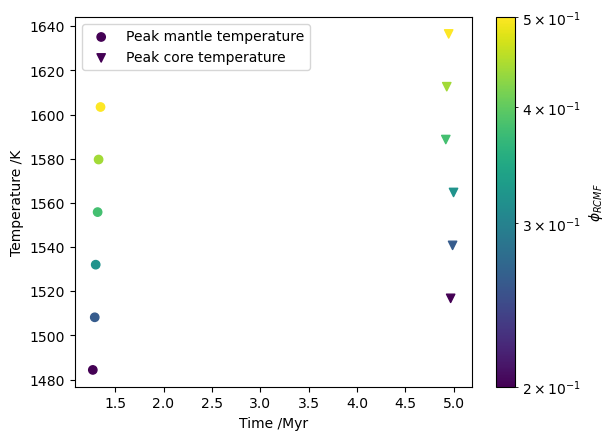

In [12]:
if var!='Fe0':
    plt.figure()
    plt.scatter(data['tmax'],data['peakT'],label='Peak mantle temperature',marker='o',c=data[var],norm=mpl.colors.LogNorm())
    plt.scatter(data['tcoremax'],data['peak_coreT'],label='Peak core temperature',marker='v',c=data[var],norm=mpl.colors.LogNorm())
    plt.xlabel('Time /Myr')
    plt.legend()
    plt.ylabel('Temperature /K')
    plt.colorbar(label=varlab)

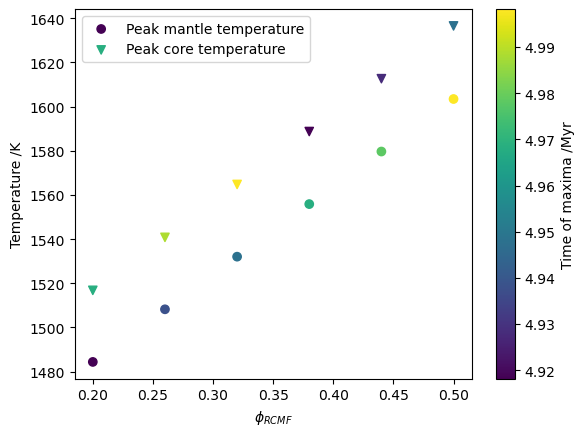

In [13]:
if var!='Fe0':
    plt.figure()
    plt.scatter(data[var],data['peakT'],label='Peak mantle temperature',marker='o',c=data['tmax'])
    plt.scatter(data[var],data['peak_coreT'],label='Peak core temperature',marker='v',c=data['tcoremax'])
    plt.xlabel(varlab)
    plt.legend()
    plt.ylabel('Temperature /K')
    #plt.xscale('log')
    plt.colorbar(label='Time of maxima /Myr')
    if save == True:
        plt.savefig(f'../Plots/{folder}/peakT_{var}.png')

Difference in peak temperatures

In [14]:
data['peak_coreT']-data['peakT']

0    32.410776
1    32.567032
2    32.700424
3    32.849852
4    32.977104
5    33.091393
dtype: float64

Difference in timing of peak temperatures

In [15]:
data['tcoremax']-data['tmax']

0    3.699645
1    3.699645
2    3.699645
3    3.599654
4    3.599654
5    3.599654
dtype: float64

# Flux-time <a class="anchor" id="Ft"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

### Two endmembers

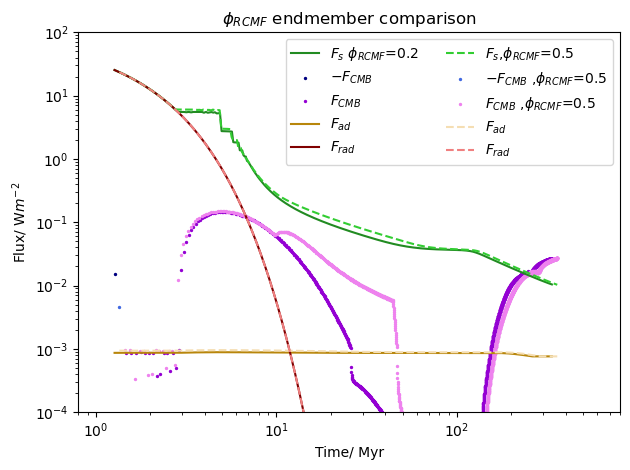

In [18]:
plt.figure(tight_layout=True)
#end member 1
plt.plot(t1,Fs1,label=f'$F_s$ {varlab}={var1}',color='forestgreen')
plt.scatter(t1[Fcmb1<0],abs(Fcmb1[Fcmb1<0]),label='$-F_{CMB}$',color='navy',s=2)
plt.scatter(t1[Fcmb1>0],Fcmb1[Fcmb1>0],label='$F_{CMB}$',color='darkviolet',s=2)
plt.plot(t1,Fad1,label='$F_{ad}$',color='darkgoldenrod')
plt.plot(t1,Frad1,label='$F_{rad}$',color='maroon')

#end member 2
plt.plot(t2,Fs2,label=f"$F_s$,{varlab}={var2}",linestyle='dashed',color='limegreen')
plt.scatter(t2[Fcmb2<0],abs(Fcmb2[Fcmb2<0]),label=f'$-F_{{CMB}}$ ,{varlab}={var2}',color='royalblue',s=2)
plt.scatter(t2[Fcmb2>0],Fcmb2[Fcmb2>0],label=f'$F_{{CMB}}$ ,{varlab}={var2}',color='violet',s=2)
plt.plot(t2,Fad2,linestyle='dashed',color='wheat',label='$F_{ad}$')
plt.plot(t2,Frad2,linestyle='dashed',color='lightcoral',label='$F_{rad}$')
plt.xlabel('Time/ Myr')
plt.xlim([0.8,800])
plt.xscale('log')
plt.yscale('log')
plt.ylim([1e-4,1e2])   #use these limits when comparing runs
plt.ylabel('Flux/ W$m^{-2}$')
plt.legend(loc='upper right',ncol=2)
plt.title(f'{varlab} endmember comparison')
if save == True:
    plt.savefig(f'../Plots/{folder}Tflux_endcomp{var}.png',dpi=450)


# Rem and core size <a class="anchor" id="Rt"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

### Just Rem <a class="anchor" id="Rem"></a>

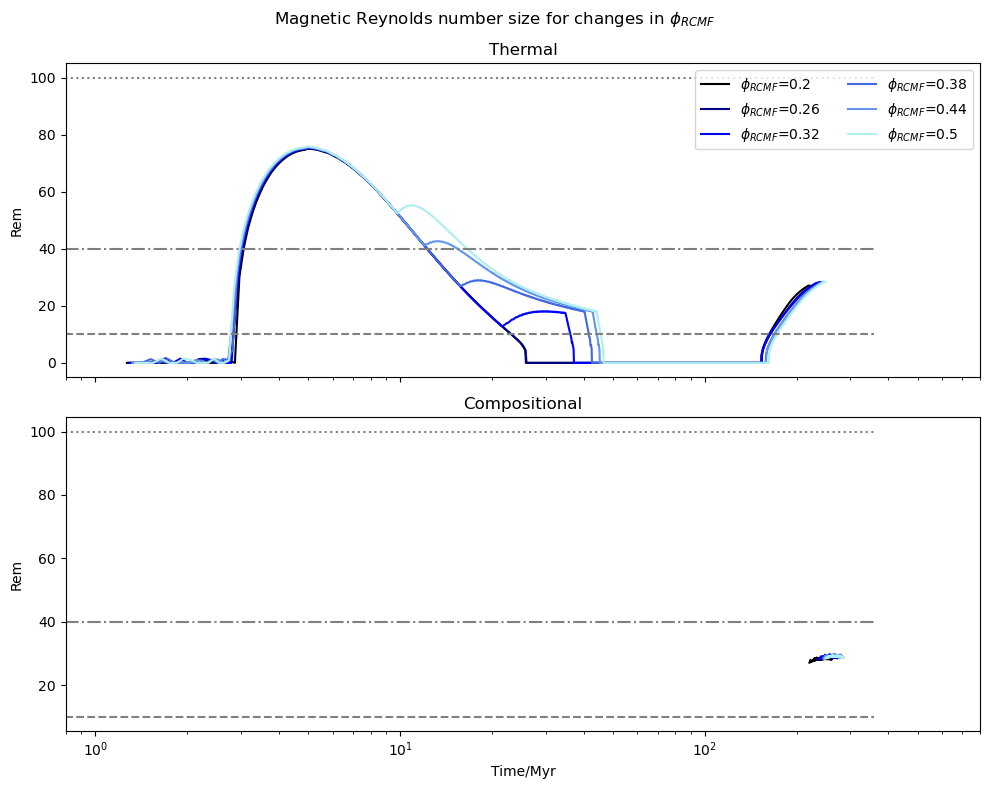

In [20]:
fig, ax = plt.subplots(nrows=2,ncols=1,sharex='col',tight_layout=True,figsize=[10,8])
fig.suptitle(f'Magnetic Reynolds number size for changes in {varlab}')

for i in range(nrun):
    run = int(minrun+i)
    varval = var_data.loc[var_data['run']==run,var].values[0]
    if var=='r':
        varval = varval/1e3
    #import data
    npzfile = np.load(f'{path}run_{run}.npz')
    therm = npzfile['therm'] # magnetic Reynolds number, Bfield and time [Myr] from thermal convection 
    comp = npzfile['comp'] # magnetic Reynolds number, Bfield and time [Myr] from compositional convection 
    Rem_t = therm[0,:] #Thermal Rem
    Rem_c = comp[0,:] #Thermo-compositional Rem (f<f0)
    therm_t = therm[2,:]
    comp_t = comp[2,:]
    
    if var=='eta0':
        ax[0].plot(therm_t,Rem_t,color=colors[i],label=f'{varlab}={varval:.1e}')
    else:
        ax[0].plot(therm_t,Rem_t,color=colors[i],label=f'{varlab}={varval}')
    
    ax[1].plot(comp_t[Rem_c!=0],Rem_c[Rem_c!=0],color=colors[i])
    
for i in range(2):   
    ax[i].hlines(10,xmin=0,xmax=comp_t[-1],color='gray',linestyle='--')
    ax[i].hlines(40,xmin=0,xmax=comp_t[-1],color='gray',linestyle='-.')
    ax[i].hlines(100,xmin=0,xmax=comp_t[-1],color='gray',linestyle='dotted')
    ax[i].set_ylabel('Rem')
ax[1].set_xlabel('Time/Myr')
ax[0].legend(ncols=2)
ax[1].set_xscale('log')
ax[1].set_xlim([0.8,800])
ax[0].set_title('Thermal')
ax[1].set_title('Compositional')

#if save == True:
    #plt.savefig(f'../Plots/{folder}Rem_{var}.png',dpi=450,bbox_inches='tight')

### Just B <a class="anchor" id="B"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

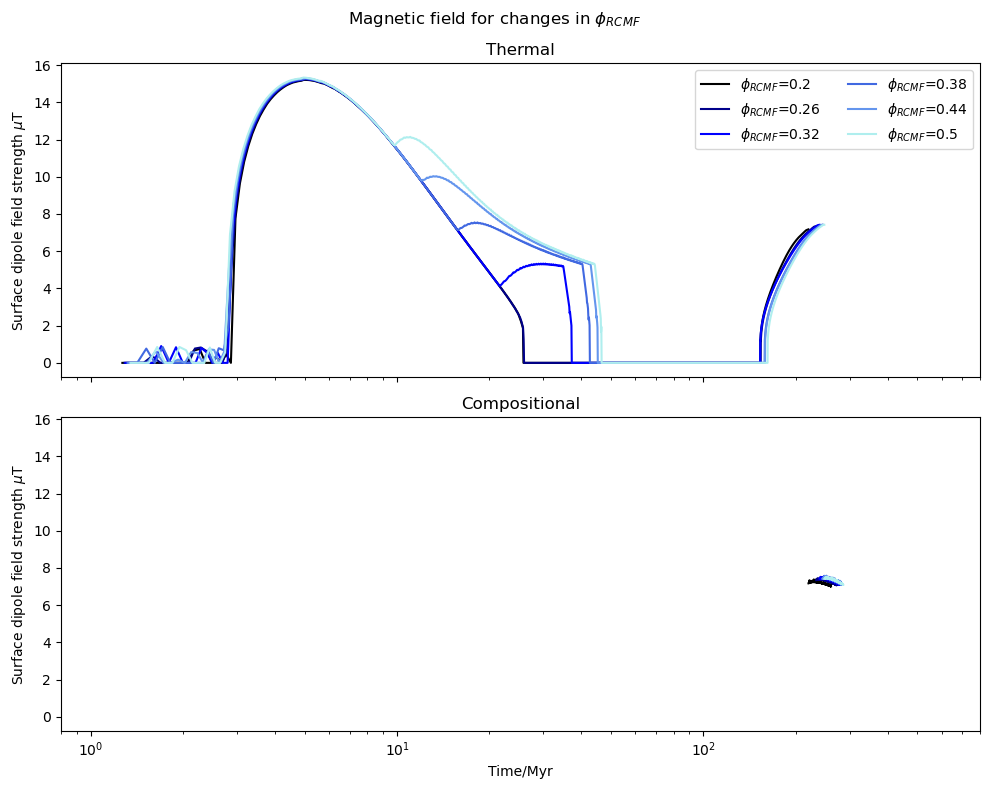

In [21]:
fig, ax = plt.subplots(nrows=2,ncols=1,sharex='col',sharey=True,tight_layout=True,figsize=[10,8])
fig.suptitle(f'Magnetic field for changes in {varlab}')

for i in range(nrun):
    run = int(minrun+i)
    varval = var_data.loc[var_data['run']==run,var].values[0]
    if var=='r':
        varval = varval/1e3
    #import data
    npzfile = np.load(f'{path}run_{run}.npz')
    therm = npzfile['therm'] # magnetic Reynolds number, Bfield and time [Myr] from thermal convection 
    comp = npzfile['comp'] # magnetic Reynolds number, Bfield and time [Myr] from compositional convection 
    Btherm = therm[1,:]/1e-6
    Bcomp = comp[1,:]/1e-6
    Rem_c = comp[0,:] #Thermo-compositional Rem (f<f0)
    therm_t = therm[2,:]
    comp_t = comp[2,:]
    
    if var =='eta0':
        ax[0].plot(therm_t,Btherm,color=colors[i],label=f'{varlab}={varval:.1e}')
    else:
        ax[0].plot(therm_t,Btherm,color=colors[i],label=f'{varlab}={varval}')
    ax[1].plot(comp_t[Rem_c!=0],Bcomp[Rem_c!=0],color=colors[i])
    
for i in range(2):   
    ax[i].set_ylabel('Surface dipole field strength $\\mu$T')
ax[1].set_xlabel('Time/Myr')
ax[0].legend(ncols=2)
ax[1].set_xscale('log')
ax[1].set_xlim([0.8,800])
ax[0].set_title('Thermal')
ax[1].set_title('Compositional')


#plt.savefig(f'../Plots/{folder}B_{var}.png',dpi=450,bbox_inches='tight')

### Rem and B on the same plot - compositional and thermal split <a class="anchor" id="BRem-split"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

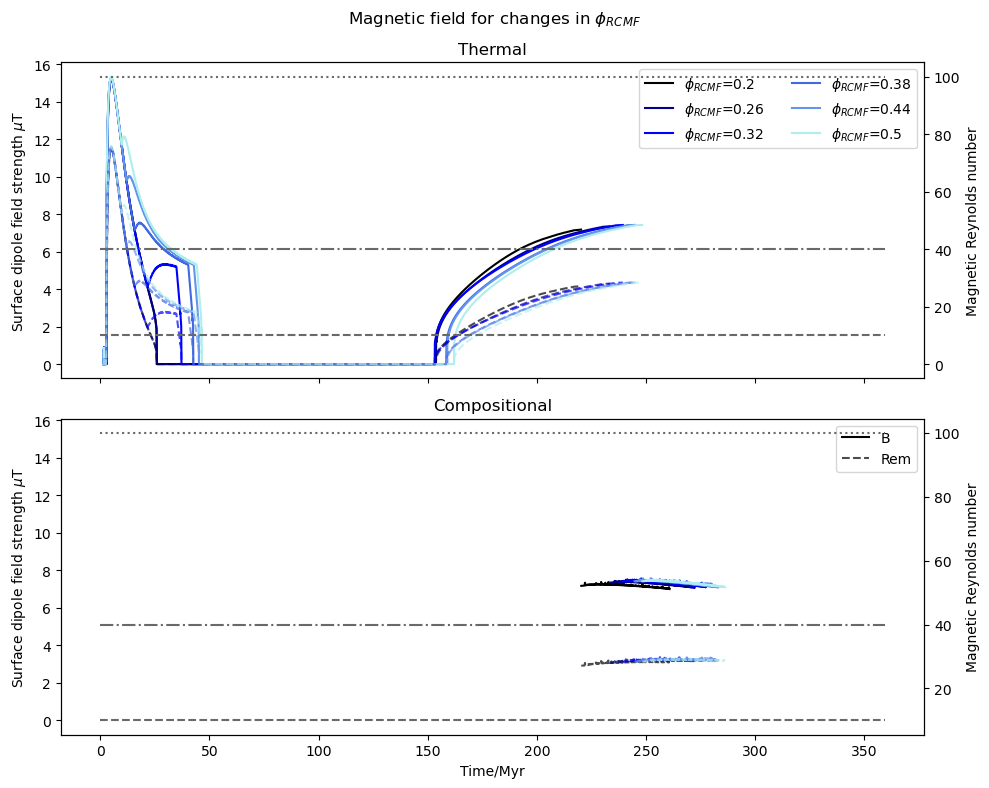

In [52]:
fig, ax = plt.subplots(nrows=2,ncols=1,sharex='col',sharey=True,tight_layout=True,figsize=[10,8])
fig.suptitle(f'Magnetic field and Reynolds number for changes in {varlab}')
ax2 = ax[0].twinx()
ax3 = ax[1].twinx()

for i in range(nrun):
    run = int(minrun+i)
    varval = var_data.loc[var_data['run']==run,var].values[0]
    if var=='r':
        varval = varval/1e3
    #import data
    npzfile = np.load(f'{path}run_{run}.npz')
    therm = npzfile['therm'] # magnetic Reynolds number, Bfield and time [Myr] from thermal convection 
    comp = npzfile['comp'] # magnetic Reynolds number, Bfield and time [Myr] from compositional convection 
    Btherm = therm[1,:]/1e-6
    Bcomp = comp[1,:]/1e-6
    Rem_c = comp[0,:] #Thermo-compositional Rem (f<f0)
    Rem_t = therm[0,:] #Thermal Rem
    therm_t = therm[2,:]
    comp_t = comp[2,:]
    
    #Thermal plot
    if var =='eta0':
        ax[0].plot(therm_t,Btherm,color=colors[i],label=f'{varlab}={varval:.1e}')
    else:
        ax[0].plot(therm_t,Btherm,color=colors[i],label=f'{varlab}={varval}')
    ax2.plot(therm_t,Rem_t,color=colors[i],linestyle='dashed',alpha=0.7)
    
    #Compositional plot
    if i == 0:   
        ln1 = ax[1].plot(comp_t[Rem_c!=0],Bcomp[Rem_c!=0],color=colors[i])
        ln2 = ax3.plot(comp_t[Rem_c!=0],Rem_c[Rem_c!=0],color=colors[i],linestyle='dashed',alpha=0.7)
    else:
        ax[1].plot(comp_t[Rem_c!=0],Bcomp[Rem_c!=0],color=colors[i])
        ax3.plot(comp_t[Rem_c!=0],Rem_c[Rem_c!=0],color=colors[i],linestyle='dashed',alpha=0.7)

for i in range(2):   
    ax[i].set_ylabel('Surface dipole field strength $\\mu$T')
ax2.set_ylabel('Magnetic Reynolds number')
ax3.set_ylabel('Magnetic Reynolds number')

#add horizontal lines
ax2.hlines(10,xmin=0,xmax=comp_t[-1],color='dimgray',linestyle='--')
ax2.hlines(40,xmin=0,xmax=comp_t[-1],color='dimgray',linestyle='-.')
ax2.hlines(100,xmin=0,xmax=comp_t[-1],color='dimgray',linestyle='dotted')
ax3.hlines(10,xmin=0,xmax=comp_t[-1],color='dimgray',linestyle='--')
ax3.hlines(40,xmin=0,xmax=comp_t[-1],color='dimgray',linestyle='-.')
ax3.hlines(100,xmin=0,xmax=comp_t[-1],color='dimgray',linestyle='dotted')

ax[1].set_xlabel('Time/Myr')
ax[0].legend(ncols=2)
ax[1].legend(ln1+ln2,['B','Rem'])
#ax[1].set_xscale('log')
ax[0].set_title('Thermal')
ax[1].set_title('Compositional')


#plt.savefig(f'../Plots/{folder}BRem_{var}.png',dpi=450,bbox_inches='tight')

### B, Rem and compositional/thermal buoyancy flux <a class="anchor" id="BRem-p"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

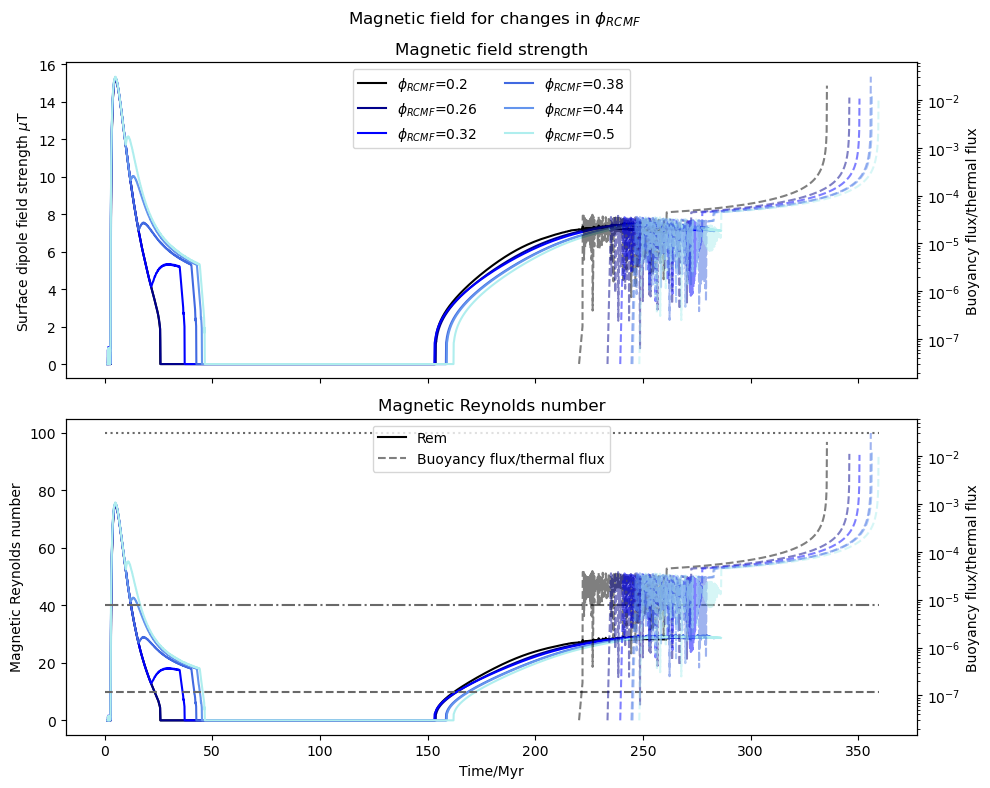

In [66]:
fig, ax = plt.subplots(nrows=2,ncols=1,sharex='col',tight_layout=True,figsize=[10,8])
ax2 = ax[0].twinx()
ax3 = ax[1].twinx()

for i in range(nrun):
    run = int(minrun+i)
    varval = var_data.loc[var_data['run']==run,var].values[0]
    if var=='r':
        varval = varval/1e3
    #import data
    npzfile = np.load(f'{path}run_{run}.npz')
    tplot = npzfile['t']/Myr
    therm = npzfile['therm'] # magnetic Reynolds number, Bfield and time [Myr] from thermal convection 
    comp = npzfile['comp'] # magnetic Reynolds number, Bfield and time [Myr] from compositional convection 
    Btherm = therm[1,:]/1e-6
    Bcomp = comp[1,:]/1e-6
    B = np.concatenate([Btherm,Bcomp])
    Rem_c = comp[0,:] #Thermo-compositional Rem (f<f0)
    Rem_t = therm[0,:] #Thermal Rem
    Rem = np.concatenate([Rem_t,Rem_c])
    therm_t = therm[2,:]
    comp_t = comp[2,:]

    npzfile2 = np.load(f'{path}buoy_ratio_{run}.npz')
    buoy = npzfile2['buoy'] #ratio of compositional/thermal flux
    
    #B plot
    if var =='eta0':
        ax[0].plot(therm_t,Btherm,color=colors[i],label=f'{varlab}={varval:.1e}')
        ax[0].plot(comp_t[Rem_c!=0],Bcomp[Rem_c!=0],color=colors[i])
    else:
        ax[0].plot(therm_t,Btherm,color=colors[i],label=f'{varlab}={varval}')
        ax[0].plot(comp_t[Rem_c!=0],Bcomp[Rem_c!=0],color=colors[i])
    ax2.plot(tplot[buoy>0],buoy[buoy>0],color=colors[i],linestyle='dashed',alpha=0.5)
    
    #Rem plot
    if i == 0:   
        ax[1].plot(therm_t,Rem_t,color=colors[i])
        ln1 = ax[1].plot(comp_t[Rem_c!=0],Rem_c[Rem_c!=0],color=colors[i],label='Rem')
        ln2 = ax3.plot(tplot[buoy>0],buoy[buoy>0],color=colors[i],linestyle='dashed',alpha=0.5)
    else:
        ax[1].plot(therm_t,Rem_t,color=colors[i])
        ax[1].plot(comp_t[Rem_c!=0],Rem_c[Rem_c!=0],color=colors[i])
        ax3.plot(tplot[buoy>0],buoy[buoy>0],color=colors[i],linestyle='dashed',alpha=0.5)
    
ax[1].hlines(10,xmin=0,xmax=comp_t[-1],color='dimgray',linestyle='--')
ax[1].hlines(40,xmin=0,xmax=comp_t[-1],color='dimgray',linestyle='-.')
ax[1].hlines(100,xmin=0,xmax=comp_t[-1],color='dimgray',linestyle='dotted')

ax[0].set_ylabel('Surface dipole field strength $\\mu$T')
ax[1].set_ylabel('Magnetic Reynolds number')
ax2.set_ylabel('Buoyancy flux/thermal flux')
ax3.set_ylabel('Buoyancy flux/thermal flux')

ax[1].set_xlabel('Time/Myr')
ax[0].legend(ncols=2,loc='upper center')
ax[1].legend(ln1+ln2,['Rem','Buoyancy flux/thermal flux'],loc='upper center')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax[0].set_title('Magnetic field strength')
ax[1].set_title('Magnetic Reynolds number')


#plt.savefig(f'../Plots/{folder}BRem_buoy_{var}.png',dpi=450,bbox_inches='tight')

### B and Rem with onset of solidification <a class="anchor" id="BRem-solid"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

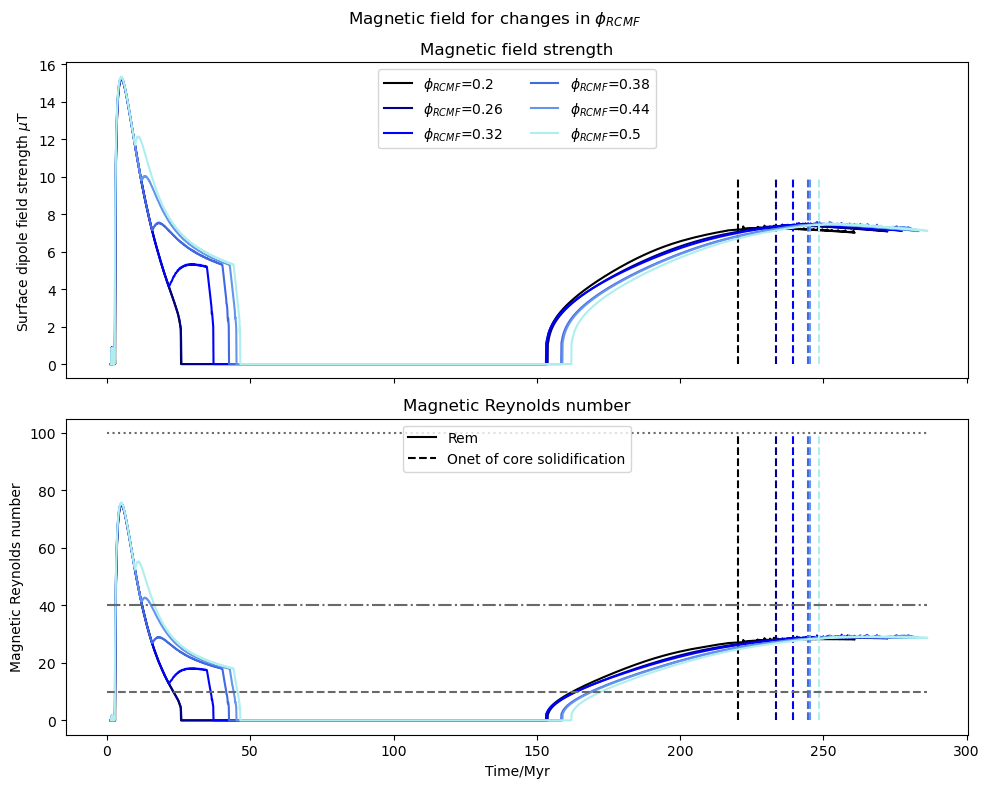

In [71]:
fig, ax = plt.subplots(nrows=2,ncols=1,sharex='col',tight_layout=True,figsize=[10,8])
fig.suptitle(f'Magnetic field for changes in {varlab}')

for i in range(nrun):
    run = int(minrun+i)
    varval = var_data.loc[var_data['run']==run,var].values[0]
    if var=='r':
        varval = varval/1e3
    #import data
    npzfile = np.load(f'{path}run_{run}.npz')
    tplot = npzfile['t']/Myr
    therm = npzfile['therm'] # magnetic Reynolds number, Bfield and time [Myr] from thermal convection 
    comp = npzfile['comp'] # magnetic Reynolds number, Bfield and time [Myr] from compositional convection 
    Btherm = therm[1,:]/1e-6
    Bcomp = comp[1,:]/1e-6
    B = np.concatenate([Btherm,Bcomp])
    Rem_c = comp[0,:] #Thermo-compositional Rem (f<f0)
    Rem_t = therm[0,:] #Thermal Rem
    Rem = np.concatenate([Rem_t,Rem_c])
    therm_t = therm[2,:]
    comp_t = comp[2,:]

    npzfile2 = np.load(f'{path}buoy_ratio_{run}.npz')
    buoy = npzfile2['buoy'] #ratio of compositional/thermal flux
    
    #B plot
    if var =='eta0':
        ax[0].plot(therm_t,Btherm,color=colors[i],label=f'{varlab}={varval:.1e}')
        ax[0].plot(comp_t[Rem_c!=0],Bcomp[Rem_c!=0],color=colors[i])
        ax[0].vlines(tplot[buoy>0][0],0,10,color=colors[i],linestyle='dashed')
    else:
        ax[0].plot(therm_t,Btherm,color=colors[i],label=f'{varlab}={varval}')
        ax[0].plot(comp_t[Rem_c!=0],Bcomp[Rem_c!=0],color=colors[i])
        ax[0].vlines(tplot[buoy>0][0],0,10,color=colors[i],linestyle='dashed')
    
    #Rem plot
    if i == 0:   
        ax[1].plot(therm_t,Rem_t,color=colors[i])
        ax[1].plot(comp_t[Rem_c!=0],Rem_c[Rem_c!=0],color=colors[i],label='Rem')
        ax[1].vlines(tplot[buoy>0][0],0,100,color=colors[i],linestyle='dashed',label='Onet of core solidification')
    else:
        ax[1].plot(therm_t,Rem_t,color=colors[i])
        ax[1].plot(comp_t[Rem_c!=0],Rem_c[Rem_c!=0],color=colors[i])
        ax[1].vlines(tplot[buoy>0][0],0,100,color=colors[i],linestyle='dashed')
    
ax[1].hlines(10,xmin=0,xmax=comp_t[Rem_c>0][-1],color='dimgray',linestyle='--')
ax[1].hlines(40,xmin=0,xmax=comp_t[Rem_c>0][-1],color='dimgray',linestyle='-.')
ax[1].hlines(100,xmin=0,xmax=comp_t[Rem_c>0][-1],color='dimgray',linestyle='dotted')

ax[0].set_ylabel('Surface dipole field strength $\\mu$T')
ax[1].set_ylabel('Magnetic Reynolds number')
ax2.set_ylabel('Buoyancy flux/thermal flux')
ax3.set_ylabel('Buoyancy flux/thermal flux')

ax[1].set_xlabel('Time/Myr')
ax[0].legend(ncols=2,loc='upper center')
ax[1].legend(loc='upper center')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax[0].set_title('Magnetic field strength')
ax[1].set_title('Magnetic Reynolds number')

if save == True:
    plt.savefig(f'../Plots/{folder}BRem_onset_{var}.png',dpi=450,bbox_inches='tight')

### Inner core size <a class="anchor" id="f"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

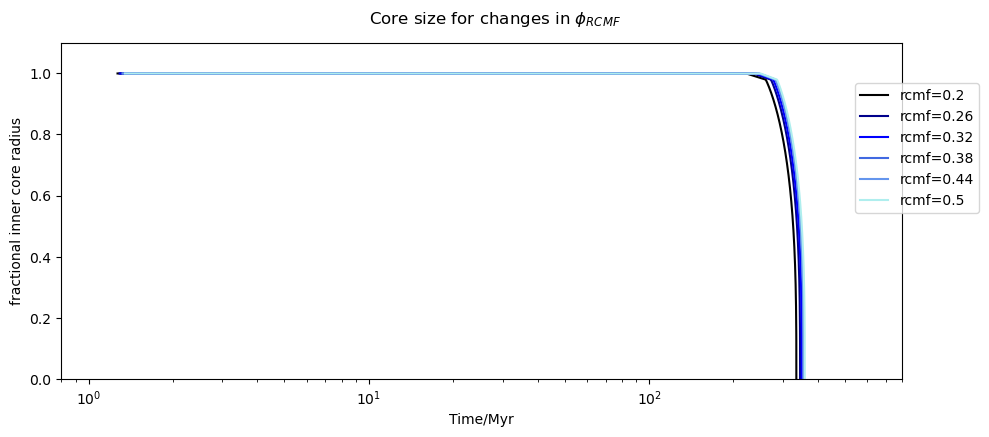

In [23]:
plt.figure(tight_layout=True,figsize=[10,8])
plt.suptitle(f'Core size for changes in {varlab}')
plt.subplot(2,1,1)
for i in range(nrun):
    run = int(minrun+i)
    varval = var_data.loc[var_data['run']==run,var].values[0]
    if var=='r':
        varval = varval/1e3
    #import data
    npzfile = np.load(f'{path}run_{run}.npz')
    t = npzfile['t']/Myr #time in Myr
    f = npzfile['f']
    plt.plot(t,f,label=f'{var}={varval}',color=colors[i])
plt.xlabel('Time/Myr')
plt.ylabel('fractional inner core radius')
plt.legend(bbox_to_anchor=[1.1,0.9])
plt.xscale('log')
plt.xlim([0.8,800])
plt.ylim([0,1.1])
if save == True:
    plt.savefig(f'../Plots/{folder}f_{var}.png',dpi=450,bbox_inches='tight')

# Timings <a class="anchor" id="time"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

In [25]:
import seaborn as sns

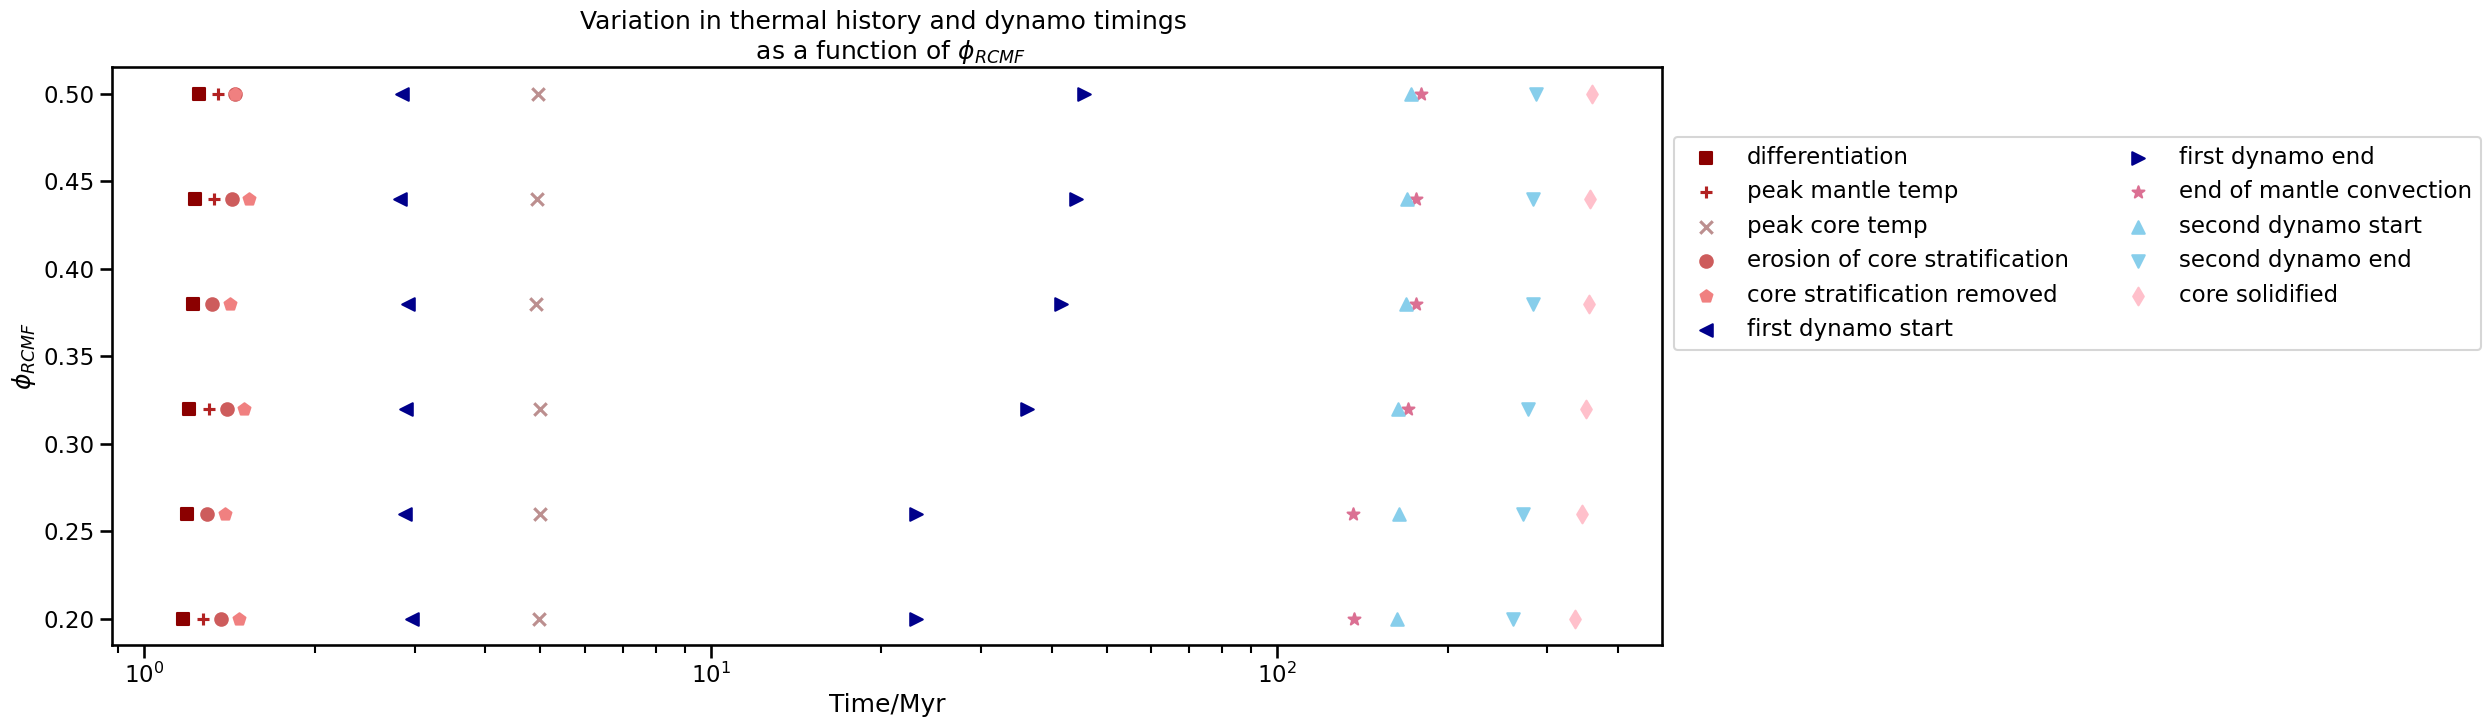

In [26]:
with sns.plotting_context('talk'):
    plt.figure(figsize=[20,7.5])
    plt.title(f'Variation in thermal history and dynamo timings \n as a function of {varlab}')
    plt.scatter(data['diff_time'],data[var],label='differentiation',marker='s',color='darkred')
    plt.scatter(data['tmax'],data[var],label='peak mantle temp',marker='+',color='firebrick')
    plt.scatter(data['tcoremax'],data[var],label='peak core temp',marker='x',color='rosybrown')
    plt.scatter(data['tstrat_remove'],data[var],label='erosion of core stratification',marker='o',color='indianred')
    plt.scatter(data['terode'],data[var],label='core stratification removed',marker='p',color='lightcoral')
    plt.scatter(data['magon_1'],data[var],label='first dynamo start',marker='<',color='darkblue')
    plt.scatter(data['magoff_1'],data[var],label='first dynamo end',marker='>',color='darkblue')
    plt.scatter(data['fcond_t'],data[var],label='end of mantle convection',marker='*',color='palevioletred')
    plt.scatter(data['magon_2'],data[var],label='second dynamo start',marker='^',color='skyblue')
    plt.scatter(data['magoff_2'],data[var],label='second dynamo end',marker='v',color='skyblue')
    plt.scatter(data['tsolid'],data[var],label='core solidified',marker='d',color='pink')
    plt.xlabel('Time/Myr')
    plt.xscale('log')
    if logvar == True:
        plt.yscale('log')
    plt.ylabel(varlab)
    plt.legend(ncols=2,bbox_to_anchor=(1,0.9))
if save == True:
    plt.savefig(f'../Plots/{folder}all_timings_{var}.png',dpi=450,bbox_inches='tight') 

### Dynamo generation time <a class="anchor" id="dynamo"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

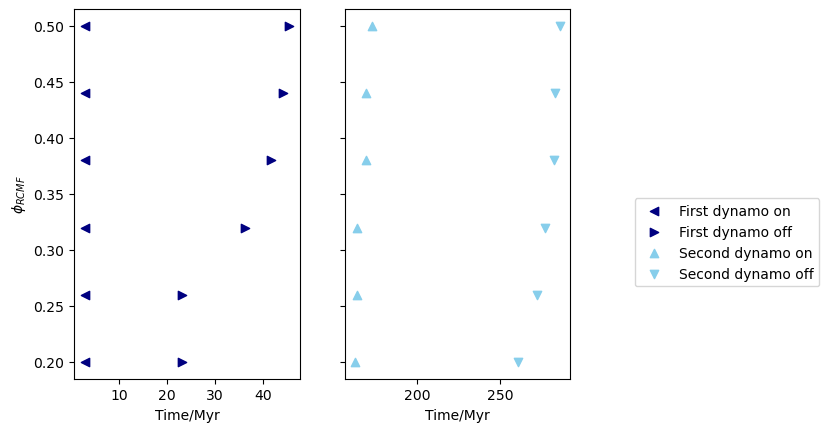

In [83]:
fig, ax = plt.subplots(nrows=1,ncols=2,sharey=True)
ax[0].scatter(data['magon_1'],data[var],label='First dynamo on',marker='<',color='navy')
ax[0].scatter(data['magoff_1'],data[var],label='First dynamo off',marker='>',color='navy')

ax[1].scatter(data['magon_2'],data[var],label='Second dynamo on',marker='^',color='skyblue')
ax[1].scatter(data['magoff_2'],data[var],label='Second dynamo off',marker='v',color='skyblue')

ax[0].set_ylabel(varlab)
ax[0].set_xlabel('Time/Myr')
ax[1].set_xlabel('Time/Myr')
fig.legend(bbox_to_anchor=[1.3,0.5])

#plt.savefig(f'../Plots/{folder}/dynamot_{var}.png')

### Solidification time <a class="anchor" id="solid"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

In [27]:
if var == 'Fe0':
    cmap = plt.colormaps['viridis']
    bounds = [-0.5e-8,0.5e-8,0.5e-7,1.5e-7,1e-6]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    fig = plt.figure()
    plt.scatter(data[var],data['tsolid'],label='Peak mantle temperature',marker='o')
    plt.xlabel(varlab)
    plt.ylabel('Core solidification time /Myr')

    if save == True:
        plt.savefig(f'../Plots/{folder}/solidt_{var}.png',bbox_inches='tight') 